**Goal:** Introduce concepts of probability and random
  processes in the context of model physical systems. 
  
- Start with the simplest model: the intoxicated walk.  
- Each step is of equal length $l$ and independent of the preceding step.
- At each interval the walker has a probability $p$ of a step to
  the right and probability $q=1-p$ of a step to the left.
- Let $n_r$ be the number steps to the right and $n_l$ be the
  number of steps to the left.  
-  The total number of steps is $N = n_r + n_l$ and the net
  displacement is $x = (n_r - n_l)/l$ where $-Nl \le x \le Nl$.
- The main quantity of interest is the probability $P_N(x)$ that
  after $N$ steps, the walker has undergone a net displacement $x$.
  
- The mean net displacement is ($\sum P_N(x) = 1$)

\begin{equation*}
\langle x_N \rangle = \sum_{x = -Nl}^{Nl} x P_N(x)
\end{equation*}

- The variance is

\begin{equation*}
\langle \Delta x_N^2 \rangle = \langle x_N^2 \rangle - \langle x_N \rangle^2
\end{equation*}

where

\begin{equation*}
\langle x_N^2 \rangle = \sum_{x = -Nl}^{Nl} x^2 P_N(x)
\end{equation*}

-  The averages are over all possible walks of $N$ steps.
-  For the symmetric case, $p = q = 1$, $\langle x_N \rangle = 0$.

## Exercise 1: 1-D random walk

1. Comment the program below and plot $P_N(x)$ for $ntrials = [10,100,1000,10000].$

2. Normalize $P_N(x)$ such that $\sum P_N(x) = 1.0$.

3. Determine $\langle x_N \rangle$ and $\langle \Delta x_N^2 \rangle$.  Compare with the analytical results (e.g., Reif, Fundamentals of Statistical and
  Thermal Physics),

\begin{equation*}
\langle x_N \rangle = (p - q)Nl
\end{equation*}

and

\begin{equation*}
\langle \Delta x_N^2 \rangle = 4pqNl^2
\end{equation*}

4. Determine the number of trials necessary to obtain $\langle \Delta x^2 \rangle$ to 1\% accuracy. 

**Roughly $>$ 1000.**

5. Show that $P_N(x)$ can be approximated by a Gaussian distribution

\begin{equation*}
P(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x- \langle x \rangle)^2/(2 \sigma^2)}
\end{equation*}

where $\sigma^2 = \langle \Delta x^2 \rangle$.  Does the fit work equally well for all $x$?

**Because pN is sampled every other grid point, the Gaussian must be scaled up by 2x.**


6. Suppose that $p= 0.7$.  Compute $\langle x_N \rangle$, $\langle x_N^2 \rangle$, and $\langle \Delta x_N^2 \rangle$.


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

def mean_x(x,pN):
    xbar = np.sum(x*pN)
    xbar2 = np.sum(x**2*pN)
    return xbar,xbar2

def get_pN(x,ntrial):
    pN = np.zeros(len(x))
    wh = np.where(x == 0.0)
    for _ in range(ntrial):
        i = wh[0]
        for _ in range(N):
            if (rnd.random() <= p):
                i = i+l
            else:
                i = i-l
        pN[int(np.round(i))] += 1.0
    return pN


Sigma, %error, ntrial:  10.74988372030135 34.373546503766875 10


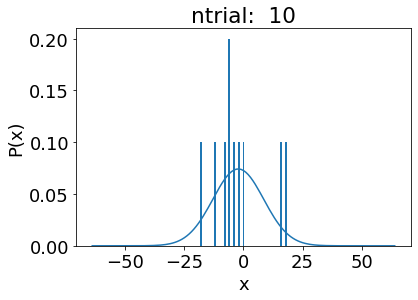

Sigma, %error, ntrial:  8.136436566458316 1.705457080728956 100


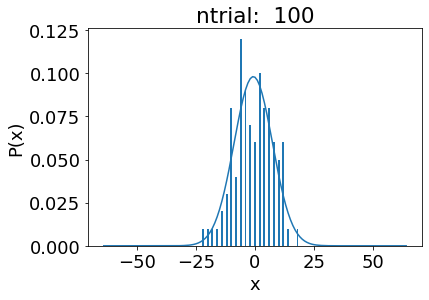

Sigma, %error, ntrial:  7.824228013037453 2.197149837031842 1000


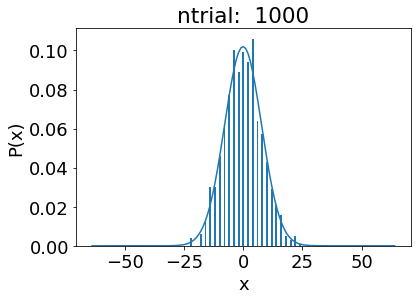

Sigma, %error, ntrial:  8.032402258353349 0.40502822941685945 10000


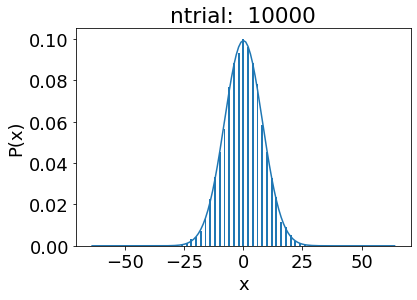

In [44]:
# part 1.

p = 0.5  #probability for right step
q = 1-p
N = 64
l = 1.0
ntrial = np.array([10,100,1000,10000])

x = np.arange(-N,(N+1),1)

for i in range(len(ntrial)):
    pN = get_pN(x,ntrial[i])

    pN = pN/pN.sum()

    [xbar,xbar2] = mean_x(x,pN)
    sigma = np.sqrt(xbar2 - xbar**2)
    sigma_exact = np.sqrt(4*p*q*N*l**2)

    plt.figure()
    plt.bar(x,pN)

    print('Sigma, %error, ntrial: ',sigma,100*abs(sigma-sigma_exact)/sigma_exact, ntrial[i] )
    pgauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x-xbar)**2/(2*sigma**2))
    plt.plot(x,2*pgauss)
    plt.xlabel('x')
    plt.ylabel('P(x)')
    plt.title('ntrial:  {:}'.format(ntrial[i]))
    plt.show()
        


<x>, <x2>, <dx^2>:  25.45 699.2280000000001 51.52550000000008
Sigma, %error, ntrial:  7.178126496517046 2.1002737551859307 1000


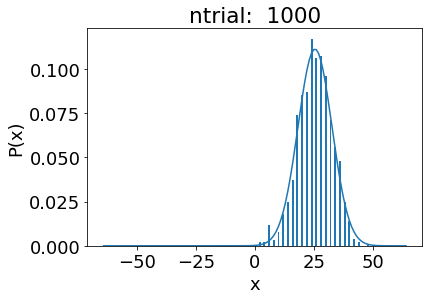

In [45]:
# part 4

p = 0.7  #probability for right step
q = 1-p
N = 64
l = 1.0
ntrial = 1000

x = np.arange(-N,(N+1),1)

pN = get_pN(x,ntrial)

pN = pN/pN.sum()

[xbar,xbar2] = mean_x(x,pN)
sigma = np.sqrt(xbar2 - xbar**2)
sigma_exact = np.sqrt(4*p*q*N*l**2)

plt.figure()
plt.bar(x,pN)

print('<x>, <x2>, <dx^2>: ',xbar,xbar2,xbar2 - xbar**2)
print('Sigma, %error, ntrial: ',sigma,100*abs(sigma-sigma_exact)/sigma_exact, ntrial )
pgauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x-xbar)**2/(2*sigma**2))
plt.plot(x,2*pgauss)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('ntrial:  {:}'.format(ntrial))
plt.show()

# Exercise 2: 2-D diffusion

Consider a collection of $M$ bees which are initially localized in a circle of unit radius centered on the origin. At each time step, each bee moves at random with equal probability to one of four possible directions. 

1. Comment "class bees" which models the "diffusion" of a bee swarm. 

2. Plot the bees as points and describe the qualitative nature of the motion of the swarm as a function of time. 

3. Suppose that each bee is given a random initial velocity in one of the four directions.  At each time interval, each bee takes a step of magnitude unity in the same direction as its original velocity.  Is the motion of the swarm changed from part 2?  

4. Compute $\langle x_N \rangle$, $\langle y_N \rangle$, $\langle \Delta x_N^2 \rangle$, and $\langle \Delta y_N^2 \rangle$ for both cases above. Also compute  the net mean square displacement
$$\langle \Delta R_N^2 \rangle = \langle \Delta x_N^2 \rangle + \langle \Delta y_N^2 \rangle - \langle x_N \rangle \langle x_N \rangle - \langle y_N \rangle \langle y_N \rangle $$
What is the qualitative dependence of these quantities on the number of time steps?  

5. Plot the diffusion coefficient $D(t) = \langle \Delta R_N^2(t) \rangle/(2 d t)$ (where $d$ is the spatial dimension, i.e., 2) as a function of time and compare your results with the analytical solution to the diffusion equation of the form
\begin{equation*}
P(x,t) = (2 \pi D t)^{-1/2} e^{-x^2/4 D t}
\end{equation*}
Note that the measure of "time" in this context is arbitrary.  The usual definition is that one unit of time corresponds to one Monte Carlo step per particle.  During one Monte Carlo step per particle, each particle attempts one jump *on the average*.

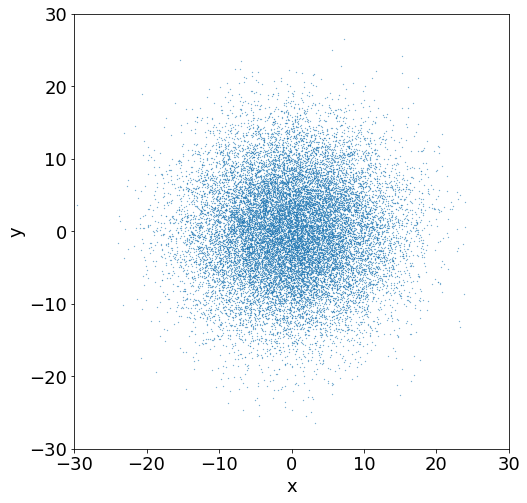

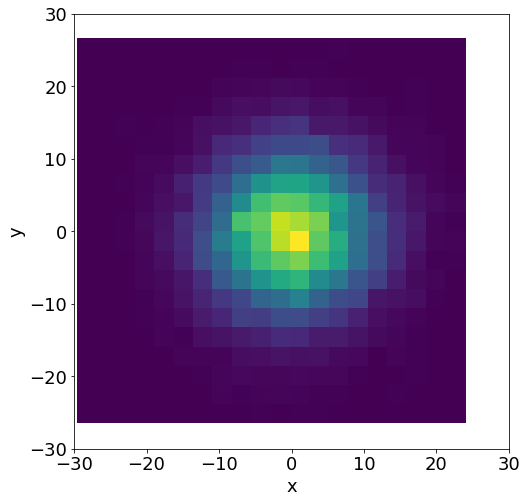

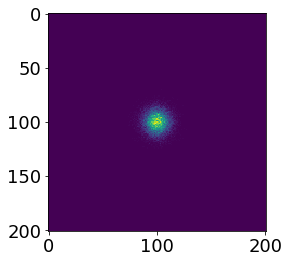

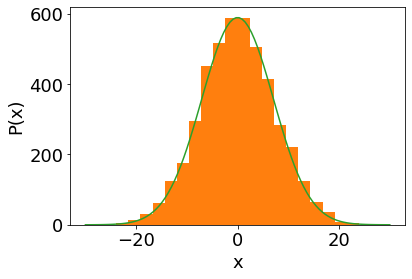

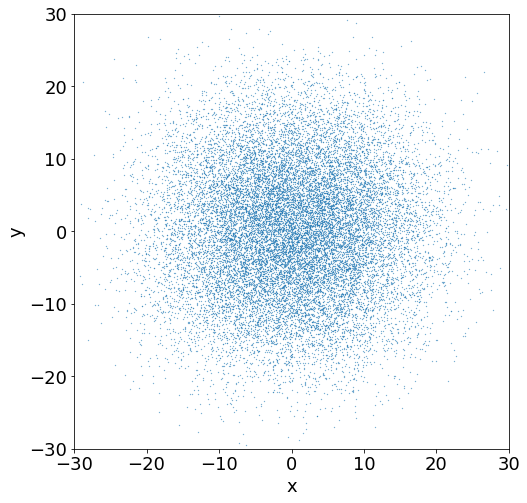

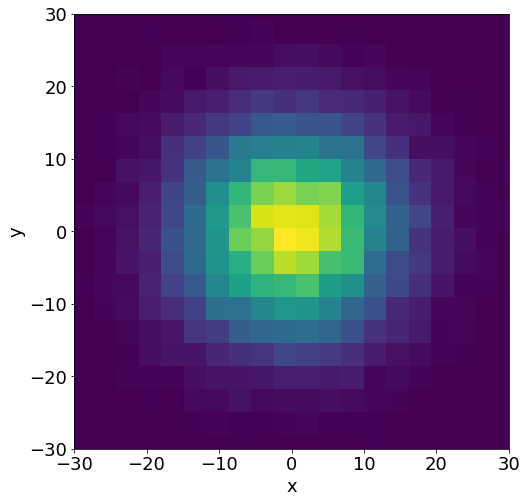

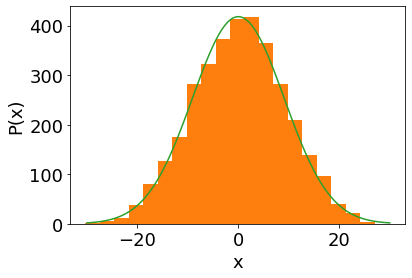

In [46]:
plt.rcParams.update({'font.size': 18})
from mpl_toolkits.mplot3d import Axes3D

class bees:

    def __init__(self,N,nsteps):
        self.N = N
        self.x = np.arange(-nsteps,(nsteps+1),1)
        self.y = np.arange(-nsteps,(nsteps+1),1)
        self.xpos = -1 +2*np.random.rand(N)
        self.ypos = -1 +2*np.random.rand(N)
        self.vx = (-1 + 2*np.random.rand(N))/10
        self.vy = (-1 + 2*np.random.rand(N))/10
        self.p = 0.5
        self.stepsize = 1.0
        self.nsteps = nsteps
        self.pN = np.zeros([2*nsteps+1,2*nsteps+1])

    def move_bees(self):
        for i in range(self.N):
            for _ in range(self.nsteps):
                r = rnd.random()
                if (r <= 0.5):
                    if (rnd.random() <= self.p):
                        self.xpos[i] = self.xpos[i] + self.stepsize
                    else:
                        self.xpos[i] = self.xpos[i] - self.stepsize
                else:
                    if (rnd.random() <= self.p):
                        self.ypos[i] = self.ypos[i] + self.stepsize
                    else:
                        self.ypos[i] = self.ypos[i] - self.stepsize
            j = int(round(self.xpos[i])) + self.nsteps  #center indices 
            k = int(round(self.ypos[i])) + self.nsteps  #center indices
            self.pN[j,k] += 1
        self.pN = self.pN/self.pN.sum()
        
    def move_bees_v_init(self):  #uses random velocity initialization.
        for i in range(self.N):
            self.xpos[i] = self.xpos[i] + self.vx[i]*self.nsteps
            self.ypos[i] = self.ypos[i] + self.vy[i]*self.nsteps
            j = int(round(self.xpos[i])) + self.nsteps  
            k = int(round(self.ypos[i])) + self.nsteps
            self.pN[j,k] += 1
        self.pN = self.pN/self.pN.sum()
                        
    def plot_bees(self,xmin,xmax):
        fig = plt.figure(figsize=(10,8))
        ax = fig.add_subplot(111)
        ax.plot(self.xpos,self.ypos,'.',markersize=0.5)
        #plt.plot(self.xpos,self.ypos,'.',markersize=0.1)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_aspect('equal')
        ax.set_xlim((xmin,xmax))
        ax.set_ylim((xmin,xmax))
        plt.show()
        
        fig = plt.figure(figsize=(10,8))
        ax = fig.add_subplot(111)
        ax.hist2d(self.xpos,self.ypos,bins=[20,20])
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_aspect('equal')
        ax.set_xlim((xmin,xmax))
        ax.set_ylim((xmin,xmax))
        plt.show()
        
    def plot_bees_1d(self,xmin,xmax,D):
        plt.figure()
        wh = np.where(abs(self.ypos) <= 2.0)
        plt.hist(self.xpos[wh[0]],bins=20)
        h = plt.hist(self.xpos[wh[0]],bins=20)
        maxh = np.max(h[0:int(len(h)/2)])
    
        plt.xlabel('x')
        plt.ylabel('P(x)')
        x = np.linspace(xmin,xmax,100)
        fx = (2*np.pi*D*self.nsteps)**(-1./2.)*np.exp(-x**2/(4*D*self.nsteps))
        plt.plot(x,maxh*fx/np.max(fx))
        plt.show()
        
    def mean_x(self):
        xbar = 0.0
        xbar2 = 0.0
        ybar = 0.0
        ybar2 = 0.0
        for j in range(len(self.y)):
            xbar += np.sum(self.x[:]*self.pN[:,j])
            xbar2 += np.sum(self.x[:]**2*self.pN[:,j])
        for i in range(len(self.x)):
            ybar += np.sum(self.y[:]*self.pN[i,:])
            ybar2 += np.sum(self.y[:]**2*self.pN[i,:])
        DeltaR2 = xbar2 + ybar2 - xbar*xbar - ybar*ybar
        return xbar,xbar2,ybar,ybar2,DeltaR2

    
N = 20000
nsteps = 100
maxx = 30
minx = -30

b = bees(N,nsteps)
b.move_bees()      
b.plot_bees(minx,maxx)

plt.figure()
plt.imshow(b.pN)
[xbar,xbar2,ybar,ybar2,DR2] = b.mean_x()
D = DR2/(2*2*nsteps)
b.plot_bees_1d(minx,maxx,D)

b.move_bees_v_init()
b.plot_bees(minx,maxx)
[xbar,xbar2,ybar,ybar2,DR2] = b.mean_x()
D = DR2/(2*2*nsteps)
b.plot_bees_1d(minx,maxx,D)



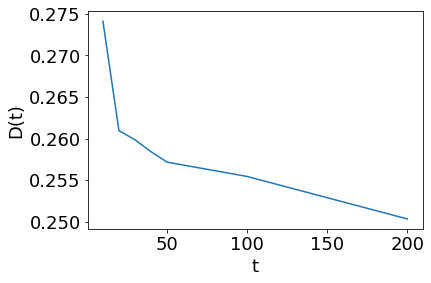

In [49]:
#Part 5

N = 20000
nsteps = 100
maxx = 30
minx = -30

nstp = np.array([10,20,30,40,50,100,200])

Darr = []
for i in range(len(nstp)):
    nsteps = nstp[i]
    b = bees(N,nsteps)
    b.move_bees()      
    [xbar,xbar2,ybar,ybar2,DR2] = b.mean_x()
    D = DR2/(2*2*nsteps)
    Darr.append(D)

plt.plot(nstp,Darr)
plt.xlabel('t')
plt.ylabel('D(t)')
plt.show()